# Import libraries

In [33]:
import pandas as pd
import numpy as np

In [34]:
from pymodulon.core import IcaData
from pymodulon import example_data
from pymodulon.io import save_to_json, load_json_model
from pymodulon.example_data import load_ecoli_data

# Creating ica_data object

## Annotation tables

### Gene table

In [35]:
gene_table = pd.read_csv("../../data/PRECISE-1K_data_files/gene_info.csv")
gene_table.index = gene_table['Unnamed: 0']
gene_table.rename(columns={"cog":"COG"},inplace=True)
gene_table.drop('Unnamed: 0',axis=1,inplace=True)
gene_table.index.name = None
gene_table.head()

,gene_name,synonyms,gene_product,COG,regulator,uniprot,start,end,strand,essential,...,y_ome,k_eff,schmidt_prot_med,heckmann_prot_med,proteomics,p1k,p1k_ctrl_log_tpm,p1k_median_log_tpm,p1k_mad_log_tpm,in_iM
b0002,thrA,thrA;thrA1;thrA2,fused aspartate kinase/homoserine dehydrogenase 1,Amino acid transport and metabolism,"RpoD,Ile-tRNA,Thr-tRNA,DksA,Fnr,ArcA,ppGpp",P00561,337,2799,+,False,...,False,True,4101.5,4434.0,True,True,10.314562,9.605329,1.042143,True
b0003,thrB,thrB,homoserine kinase,Nucleotide transport and metabolism,"RpoD,Ile-tRNA,Thr-tRNA,DksA,ppGpp",P00547,2801,3733,+,False,...,False,True,442.0,1177.0,True,True,9.982251,9.232803,1.035654,True
b0004,thrC,thrC,threonine synthase,Amino acid transport and metabolism,"RpoD,ppGpp,Ile-tRNA,Thr-tRNA,DksA",P00934,3734,5020,+,False,...,False,True,8818.5,3516.0,True,True,9.973666,9.274271,0.906287,True
b0005,yaaX,yaaX,DUF2502 domain-containing protein YaaX,Function unknown,Lrp,P75616,5234,5530,+,False,...,True,False,NaN,NaN,False,True,7.132482,6.283661,1.093146,True
b0006,yaaA,yaaA,peroxide stress resistance protein YaaA,Function unknown,NaN,P0A8I3,5683,6459,-,False,...,True,True,539.5,333.0,True,True,6.494941,6.346626,0.454519,True


### Sample table

In [36]:
sample_table = pd.read_csv("../../data/PRECISE-1K_data_files/sample_table.csv")
sample_table.index = sample_table['sample']
sample_table.drop('Unnamed: 0',axis=1,inplace=True)
sample_table.drop('sample',axis=1,inplace=True)
sample_table.index.name = "Sample ID"
sample_table.head()

,study,project,condition,rep_id,Strain Description,Strain,Culture Type,Evolved Sample,Base Media,Temperature (C),...,creator,passed_fastqc,passed_pct_reads_mapped,passed_reads_mapped_to_CDS,passed_global_correlation,full_name,passed_similar_replicates,passed_number_replicates,run_date,n_replicates
Sample ID,,,,,,,,,,,,,,,,,,,,,
control__wt_glc__1,Control,control,wt_glc,1,Escherichia coli K-12 MG1655,MG1655,Batch,No,M9,37,...,Sangwoo Seo,True,True,True,True,control:wt_glc,True,True,4/17/13,2
control__wt_glc__2,Control,control,wt_glc,2,Escherichia coli K-12 MG1655,MG1655,Batch,No,M9,37,...,Sangwoo Seo,True,True,True,True,control:wt_glc,True,True,4/17/13,2
fur__wt_dpd__1,Fur,fur,wt_dpd,1,Escherichia coli K-12 MG1655,MG1655,Batch,No,M9,37,...,Sangwoo Seo,True,True,True,True,fur:wt_dpd,True,True,10-02-2013,2
fur__wt_dpd__2,Fur,fur,wt_dpd,2,Escherichia coli K-12 MG1655,MG1655,Batch,No,M9,37,...,Sangwoo Seo,True,True,True,True,fur:wt_dpd,True,True,10-02-2013,2
fur__wt_fe__1,Fur,fur,wt_fe,1,Escherichia coli K-12 MG1655,MG1655,Batch,No,M9,37,...,Sangwoo Seo,True,True,True,True,fur:wt_fe,True,True,09-05-2013,2


### iM table

In [37]:
# imodulon_table = pd.read_csv("../../../_data/ica_data/p1k_data_files/iM_table.csv")
# imodulon_table.index = imodulon_table['name']
# imodulon_table.drop('k',axis=1,inplace=True)
# imodulon_table.head()

imodulon_table = pd.read_csv("../../data/PRECISE-1K_data_files/imodulon_table.csv", index_col=0)
imodulon_table.index.name = 'name'
imodulon_table.head()

,exp_var,imodulon_size,enrichment_category,system_category,functional_category,function,regulator,n_regs,pvalue,qvalue,...,single_gene_dominant_technical,tcs,regulon_discovery,ko,PRECISE 2.0,PRECISE 2.0_pearson,PRECISE 2.0_spearman,PRECISE,PRECISE_pearson,PRECISE_spearman
name,,,,,,,,,,,,,,,,,,,,,
Sugar Diacid,0.002413,14,Regulatory,Metabolism,Carbon Metabolism,Transport and catabolism of carbohydrate diaci...,CdaR,1.0,1.595767e-24,7.110896e-20,...,False,False,False,False,CdaR,0.952054,0.758726,CdaR,0.905552,0.562704
Translation,0.007469,53,Regulatory,Translation,Translation,Ribosome biogenesis,DksA,1.0,7.972755e-65,5.125923e-60,...,False,False,False,False,Translation,0.892858,0.764432,translation,0.667232,0.482602
ygdT,0.000344,3,Technical,Single Gene,Unknown,Unknown,NaN,NaN,NaN,NaN,...,True,False,False,False,SG_ygdT,0.653472,0.422661,NaN,NaN,NaN
OxyR,0.001747,38,Regulatory,Stress Responses,Redox Stress,"Oxidative stress response, especially peroxide",OxyR,1.0,2.620144e-27,4.708660e-23,...,False,False,False,False,OxyR,0.926352,0.730520,OxyR,0.621129,0.254705
FlhDC-2,0.030021,43,Regulatory,Stress Responses,Extracellular Structures,Flagellum biosynthesis and export,FlhDC,1.0,7.733764e-62,3.447790e-57,...,False,False,False,False,FlhDC-2,0.917180,0.439455,FlhDC,0.907624,0.310641


## M

In [38]:
M = pd.read_csv("../../data/PRECISE-1K_data_files/M.csv",)
M.index = M['Unnamed: 0']
M.drop('Unnamed: 0',axis=1,inplace=True)
M.index.name = None

M.columns = list(imodulon_table.index)
M

,Sugar Diacid,Translation,ygdT,OxyR,FlhDC-2,Osmoprotectant,Glutamine,Sialic Acid,yqhI,ROS TALE Amp,...,Tryptophanase,crp KO-2,cyoB/ndh/nuoB KO-2,tpiA KO,Phage Shock,Glyoxylate,CCK-PGI Del,Acetate,Ile/Val,UC-8
b0002,-0.005367,-0.002423,0.010140,-0.001362,-0.017297,0.008631,-0.006491,0.092469,-0.010978,-0.003400,...,-0.012070,-0.008812,0.004996,0.008216,-0.002720,0.007874,-0.004350,-0.013319,0.009296,0.000891
b0003,0.006212,-0.001901,0.007207,0.000073,-0.004829,-0.003186,-0.011677,0.082103,0.011074,-0.004679,...,0.006683,-0.017798,0.000964,0.003273,0.010018,0.002132,-0.005826,-0.010836,-0.066654,-0.003513
b0004,0.010600,-0.002205,0.004961,-0.002289,-0.004938,-0.005587,-0.008127,0.080888,0.007511,0.003887,...,0.008132,-0.018105,-0.007763,0.009103,-0.002566,-0.007120,-0.005676,-0.002164,-0.060155,-0.007025
b0005,0.011520,0.008573,0.020449,-0.003123,0.002009,-0.026382,-0.016374,0.022484,0.007903,0.017561,...,-0.000139,0.001437,0.001827,-0.008113,0.065835,-0.019238,-0.001622,-0.009303,-0.069669,-0.004241
b0006,0.003482,-0.002293,-0.010146,0.140794,-0.001754,0.000974,0.023500,-0.017665,0.006247,-0.005761,...,0.017025,0.005473,-0.002252,0.002807,-0.030303,0.000805,0.028367,0.018293,-0.018444,-0.033624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b4747,-0.003644,0.018245,-0.003134,0.004992,-0.000873,-0.021262,-0.012556,0.036707,-0.062935,0.016316,...,0.002969,-0.012892,0.024815,-0.000077,-0.004676,0.015222,0.011431,0.013733,0.011955,0.001203
b4748,0.010023,-0.030343,-0.000578,-0.002526,-0.000906,0.000805,0.007411,-0.021330,-0.013622,-0.034542,...,0.004057,-0.001059,-0.007595,0.002024,0.001573,-0.029301,-0.007873,0.021424,-0.001528,-0.000353
b4751,0.001082,0.013560,0.010030,-0.022409,0.006737,-0.012387,-0.002341,-0.010584,-0.015837,0.003776,...,-0.005873,-0.000560,0.008653,0.005759,0.029820,-0.004053,0.026769,0.020823,0.000414,-0.001453
b4755,-0.002204,-0.006527,0.003732,-0.000946,-0.009858,0.010553,-0.022747,0.003496,0.530162,0.000412,...,0.024388,0.003566,0.004696,-0.003552,0.002161,0.000556,-0.005656,0.021056,0.008180,0.021366


## Thresholds

In [39]:
thresholds = pd.read_csv("../../data/PRECISE-1K_data_files/M_thresholds.csv")
thresholds.index = list(imodulon_table.index)
thresholds = thresholds.drop("Unnamed: 0", axis=1)
thresholds = thresholds["0"].to_dict()
# thresholds

## A and sample table

In [40]:
A = pd.read_csv("../../data/PRECISE-1K_data_files/A.csv",)
A.index = A['Unnamed: 0']
A.drop('Unnamed: 0',axis=1,inplace=True)
A.index.name = None

A.columns = list(sample_table.index)
A.index = list(imodulon_table.index)
A

,control__wt_glc__1,control__wt_glc__2,fur__wt_dpd__1,fur__wt_dpd__2,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_dpd__1,fur__delfur_dpd__2,fur__delfur_fe2__1,fur__delfur_fe2__2,...,DDB3__PD-006_del-rpoS_Batch_9h__2,DDB3__PD-006_del-rpoS_Fed-batch_6h__1,DDB3__PD-006_del-rpoS_Fed-batch_6h__2,DDB3__PD-006_del-rpoS_Fed-batch_6h__3,DDB3__PD-006_del-rpoS_Fed-batch_15h__1,DDB3__PD-006_del-rpoS_Fed-batch_15h__2,DDB3__PD-009_del-tnaA_Batch_6h__1,DDB3__PD-009_del-tnaA_Fed-batch_6h__1,DDB3__PD-009_del-tnaA_Fed-batch_15h__1,DDB3__PD-009_del-tnaA_Fed-batch_15h__2
Sugar Diacid,0.048851,-0.048851,2.226245,2.238391,0.222740,0.383348,1.534940,1.480178,0.536021,0.167563,...,0.605951,3.969272,3.960774,3.431303,3.198403,3.865406,1.095074,2.575524,1.850326,2.035736
Translation,0.201055,-0.201055,-8.162122,-8.046208,1.633678,1.973262,-8.058080,-6.272859,-1.536470,-1.828831,...,2.416670,-1.187724,-1.626310,-1.492168,-0.436511,-1.004710,5.258995,-1.782148,-4.601815,-5.110518
ygdT,-0.382475,0.382475,0.066040,-0.898701,-0.556961,-1.523642,0.039413,0.002855,0.256867,-1.890067,...,-1.885401,0.689130,1.997418,2.177559,1.459224,-3.110064,4.336594,0.626609,-0.166365,0.539555
OxyR,0.130714,-0.130714,0.232581,-0.135165,-0.140487,-0.435341,-0.788937,-1.333850,0.255054,0.464381,...,-2.743285,-2.888544,-2.341820,-2.498864,-2.931448,-2.693465,-1.690293,-3.056924,-3.575826,-2.316941
FlhDC-2,-0.329000,0.329000,-5.319409,-5.196873,-7.144849,-6.758991,-5.930140,-5.934485,-1.775148,-3.070194,...,4.303118,1.626655,2.701441,1.840211,2.703303,1.862170,10.399505,-4.285524,2.349262,3.101853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Glyoxylate,0.344877,-0.344877,5.450515,5.444039,-0.641401,-0.472477,5.557743,5.070821,0.423674,0.559522,...,1.180854,2.036347,2.514846,2.469912,2.064530,2.645660,0.830452,4.243346,2.047711,2.828812
CCK-PGI Del,0.077106,-0.077106,-0.260639,0.163570,1.030188,1.220775,-0.049178,0.392918,1.611484,1.699807,...,-0.360018,0.689914,1.350155,0.510417,1.075789,2.065799,-2.090274,0.143198,-0.551313,0.908994
Acetate,0.575197,-0.575197,-2.476044,-2.875184,-0.756414,-0.251539,-1.737154,-1.652438,-1.304588,-1.319442,...,1.637433,5.259582,6.259438,5.784253,4.928517,4.221586,0.574095,12.177624,12.558275,12.767103
Ile/Val,0.226627,-0.226627,1.699217,1.678226,-1.167426,-0.618004,2.100661,2.068120,-1.050492,-1.504338,...,0.388348,-1.066533,-0.469043,-1.736812,-0.701636,-0.657140,1.027797,-2.860252,-1.283872,-1.949882


## X

In [41]:
X = pd.read_csv("../../data/PRECISE-1K_data_files/log_tpm.csv")
X.index = X['Unnamed: 0']
X.drop('Unnamed: 0',axis=1,inplace=True)
X.index.name = None
X.columns = list(sample_table.index)
X

,control__wt_glc__1,control__wt_glc__2,fur__wt_dpd__1,fur__wt_dpd__2,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_dpd__1,fur__delfur_dpd__2,fur__delfur_fe2__1,fur__delfur_fe2__2,...,DDB3__PD-006_del-rpoS_Batch_9h__2,DDB3__PD-006_del-rpoS_Fed-batch_6h__1,DDB3__PD-006_del-rpoS_Fed-batch_6h__2,DDB3__PD-006_del-rpoS_Fed-batch_6h__3,DDB3__PD-006_del-rpoS_Fed-batch_15h__1,DDB3__PD-006_del-rpoS_Fed-batch_15h__2,DDB3__PD-009_del-tnaA_Batch_6h__1,DDB3__PD-009_del-tnaA_Fed-batch_6h__1,DDB3__PD-009_del-tnaA_Fed-batch_15h__1,DDB3__PD-009_del-tnaA_Fed-batch_15h__2
b0002,-0.053993,0.053993,0.879043,1.089600,0.182453,-0.078873,-0.837092,-0.502703,0.421312,0.412354,...,-0.868029,-2.012060,-1.862453,-1.950586,-1.642161,-1.666869,-0.639387,-1.552748,-1.892598,-1.831359
b0003,-0.061973,0.061973,1.063330,1.477889,0.392573,0.234671,-0.763015,-0.120989,0.546181,0.520841,...,-1.501588,-2.532496,-2.515189,-2.443481,-2.258418,-2.312108,-1.124294,-2.060022,-2.348524,-2.122772
b0004,-0.036972,0.036972,0.003132,0.356702,-0.096756,-0.334913,-1.714913,-1.322707,-0.234147,-0.250669,...,-0.691635,-1.692102,-1.608955,-1.723764,-1.376420,-1.251488,-0.529185,-1.577833,-1.383521,-1.527079
b0005,-0.104967,0.104967,-1.118145,-1.277963,-0.181546,-0.364057,-2.121475,-1.994770,-0.386684,-0.634659,...,-2.925632,-4.626965,-4.067417,-2.964371,-3.075562,-3.101967,-2.210546,-3.821019,-4.563928,-2.946659
b0006,0.042242,-0.042242,-0.123592,-0.107778,-0.173177,-0.089888,-0.208133,-0.003044,-0.034707,-0.027806,...,0.190536,-0.618740,-0.175381,-0.317349,-0.466331,-0.169979,-0.402588,-0.915991,-0.804728,-0.858978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b4747,0.619141,-0.619141,-0.619141,-0.619141,0.202715,-0.619141,0.734510,-0.619141,0.790289,0.284033,...,-0.619141,0.766947,-0.619141,-0.619141,-0.619141,-0.619141,-0.619141,-0.619141,-0.619141,1.164489
b4748,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.421363,0.000000,0.000000,0.000000,...,5.441998,5.734377,5.614587,5.648036,5.957326,6.657140,3.672372,4.138619,5.809142,4.465101
b4751,-0.039552,0.039552,-1.290021,-1.298327,-0.481621,-0.609865,-1.680827,-1.239934,-0.134430,-0.363082,...,0.274369,-0.356653,-0.371515,-0.064824,-0.504051,0.323457,-1.267812,-0.534742,0.039449,-0.051373
b4755,-0.235166,0.235166,2.621649,3.256277,-0.302443,-0.096198,2.518406,3.268205,1.379971,0.910647,...,-0.633352,-0.039091,-0.136657,0.734843,1.699093,-2.399592,-2.399592,3.413940,1.914515,1.564518


## TRN

In [42]:
trn = pd.read_csv("../../data/PRECISE-1K_data_files/trn.csv")
trn.drop('Unnamed: 0',axis=1,inplace=True)
trn.head()

,regulator,gene_name,gene_id,effect,evidence,source
0,AccB,accB,b3255,-,0.0,RegulonDB_TF
1,RpoD,pheP,b0576,+,0.0,RegulonDB_sigma
2,RpoD,pheA,b2599,+,0.0,RegulonDB_sigma
3,RpoD,pgpB,b1278,+,0.0,RegulonDB_sigma
4,RpoD,pgpA,b0418,+,0.0,RegulonDB_sigma


## Creating ica_data

In [43]:
ica_data = IcaData(
    M = M,
    A = A, 
    X = X,
    gene_table = gene_table,
    sample_table = sample_table,
    imodulon_table = imodulon_table,
    trn = trn,
    thresholds = thresholds,                  
)

## Saving ica_data

In [44]:
from pymodulon.io import *
from os import path

In [45]:
save_to_json(ica_data,"../../data/ica_data/ecoli_p1k.json")

# Loading exisitng ica_data

In [46]:
ica_data = load_json_model("../../data/ica_data/ecoli_p1k.json")

# Adding Trp scale-down data

## Loading uncentered log_tpm

In [47]:
trp_log_tpm = pd.read_csv("../../data/RNAseq_data/log_tpm.csv")
trp_log_tpm.index = trp_log_tpm['Geneid']
trp_log_tpm.drop('Geneid',axis=1,inplace=True)
trp_log_tpm.index.name = None
trp_log_tpm

,PD_117_R11,PD_117_R12,PD_117_R13,PD_117_R14,PD_117_R15,PD_117_R16,PD_126_R5,PD_126_R6,PD_126_R7,PD_126_R8,PD_126_R9,PD_126_R10,PD_126_R11,PD_126_R12,PD_126_R13,PD_126_R14,PD_126_R15,PD_126_R16
b0001,10.268826,10.233329,9.989378,10.281131,9.962700,9.636620,9.836504,9.739149,9.352923,9.841563,9.224532,9.613361,9.284311,9.774089,9.605301,9.731442,10.175555,10.150917
b0002,9.522497,9.117753,9.139083,10.197153,9.574051,9.451363,8.840125,8.879554,8.876007,8.621536,7.686421,9.884108,8.968562,8.879801,8.979214,9.551626,10.052157,10.105885
b0003,9.083923,8.782278,8.742474,9.637226,9.655356,9.667506,8.462831,8.285814,8.433855,8.002762,7.382413,9.207278,8.474702,8.360725,8.391316,8.756942,9.230117,9.353691
b0004,8.404835,8.363498,8.215478,9.037703,9.027710,9.083592,8.035051,7.937154,8.115912,7.730761,7.205884,8.920399,8.211129,7.974355,8.084082,8.385437,8.844287,8.956960
b0005,5.696586,5.560236,5.819425,5.957660,6.105838,5.817777,6.018050,5.807079,5.409606,5.590692,4.934072,5.801173,6.031485,5.784699,6.087463,5.822245,6.174078,6.247102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b4399,4.561330,4.487753,4.325511,4.460665,4.465180,4.364449,4.524429,4.360183,4.628323,4.034039,4.306180,4.483566,4.354082,4.639547,4.546808,4.258405,4.297476,4.348727
b4400,3.965982,3.852544,3.911157,3.670875,3.723407,3.565819,4.189864,4.124781,3.754630,3.392625,3.756869,3.963679,3.943007,3.977496,3.995583,3.722543,3.785440,3.666206
b4401,9.383944,9.550908,9.519744,9.535381,9.415804,9.397539,9.342534,9.347221,9.463347,9.499498,9.472815,9.328291,9.445609,9.401922,9.437326,9.520732,9.520087,9.496412
b4402,4.110482,4.243250,3.835672,4.539405,4.594871,4.298146,4.899857,4.693538,4.290486,4.352761,4.752369,4.851449,4.845591,4.982197,4.512979,4.394099,4.473187,4.851121


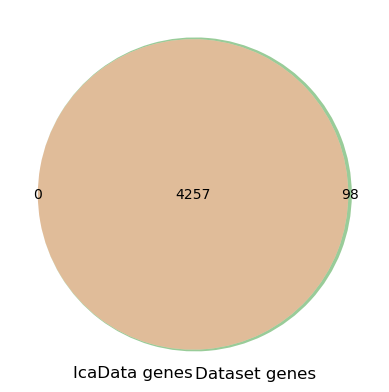

In [48]:
from matplotlib_venn import venn2
venn2((set(ica_data.gene_names),set(trp_log_tpm.index)), set_labels=['IcaData genes','Dataset genes'])

## Loading and adding p1k log_tpm (uncentered)

In [49]:
log_tpm_p1k_ref = pd.read_csv("../../data/PRECISE-1K_data_files/p1k_average_reference_log_tpm.csv")
log_tpm_p1k_ref.rename(columns={"geneid":"Geneid"},inplace=True)
log_tpm_p1k_ref.index = log_tpm_p1k_ref['Geneid']
log_tpm_p1k_ref.drop('Geneid',axis=1,inplace=True)
log_tpm_p1k_ref

,Reference
Geneid,
b0001,10.372833
b0002,10.314562
b0003,9.982251
b0004,9.973666
b0005,7.132482
...,...
b4753,2.577658
b4754,3.153057
b4755,2.399592


In [50]:
trp_combined_log_tpm = pd.concat([log_tpm_p1k_ref,trp_log_tpm],axis=1)
trp_combined_log_tpm.head()

,Reference,PD_117_R11,PD_117_R12,PD_117_R13,PD_117_R14,PD_117_R15,PD_117_R16,PD_126_R5,PD_126_R6,PD_126_R7,PD_126_R8,PD_126_R9,PD_126_R10,PD_126_R11,PD_126_R12,PD_126_R13,PD_126_R14,PD_126_R15,PD_126_R16
b0001,10.372833,10.268826,10.233329,9.989378,10.281131,9.962700,9.636620,9.836504,9.739149,9.352923,9.841563,9.224532,9.613361,9.284311,9.774089,9.605301,9.731442,10.175555,10.150917
b0002,10.314562,9.522497,9.117753,9.139083,10.197153,9.574051,9.451363,8.840125,8.879554,8.876007,8.621536,7.686421,9.884108,8.968562,8.879801,8.979214,9.551626,10.052157,10.105885
b0003,9.982251,9.083923,8.782278,8.742474,9.637226,9.655356,9.667506,8.462831,8.285814,8.433855,8.002762,7.382413,9.207278,8.474702,8.360725,8.391316,8.756942,9.230117,9.353691
b0004,9.973666,8.404835,8.363498,8.215478,9.037703,9.027710,9.083592,8.035051,7.937154,8.115912,7.730761,7.205884,8.920399,8.211129,7.974355,8.084082,8.385437,8.844287,8.956960
b0005,7.132482,5.696586,5.560236,5.819425,5.957660,6.105838,5.817777,6.018050,5.807079,5.409606,5.590692,4.934072,5.801173,6.031485,5.784699,6.087463,5.822245,6.174078,6.247102


## Centering DDB log_tpm to p1k reference

In [51]:
trp_centered_log_tpm = trp_combined_log_tpm.sub(trp_combined_log_tpm['Reference'],axis=0)
# dropping reference column, as it is already in p1k
trp_centered_log_tpm.drop('Reference',axis=1,inplace=True)
trp_centered_log_tpm

,PD_117_R11,PD_117_R12,PD_117_R13,PD_117_R14,PD_117_R15,PD_117_R16,PD_126_R5,PD_126_R6,PD_126_R7,PD_126_R8,PD_126_R9,PD_126_R10,PD_126_R11,PD_126_R12,PD_126_R13,PD_126_R14,PD_126_R15,PD_126_R16
b0001,-0.104007,-0.139504,-0.383456,-0.091702,-0.410133,-0.736213,-0.536329,-0.633684,-1.019911,-0.531270,-1.148301,-0.759472,-1.088522,-0.598745,-0.767532,-0.641391,-0.197278,-0.221916
b0002,-0.792065,-1.196810,-1.175480,-0.117409,-0.740511,-0.863199,-1.474437,-1.435009,-1.438556,-1.693026,-2.628142,-0.430454,-1.346000,-1.434762,-1.335348,-0.762936,-0.262405,-0.208677
b0003,-0.898327,-1.199972,-1.239777,-0.345025,-0.326894,-0.314745,-1.519419,-1.696437,-1.548396,-1.979488,-2.599838,-0.774973,-1.507549,-1.621525,-1.590935,-1.225309,-0.752134,-0.628560
b0004,-1.568831,-1.610168,-1.758189,-0.935963,-0.945956,-0.890075,-1.938616,-2.036512,-1.857754,-2.242905,-2.767782,-1.053267,-1.762537,-1.999311,-1.889584,-1.588229,-1.129380,-1.016706
b0005,-1.435895,-1.572246,-1.313057,-1.174822,-1.026644,-1.314704,-1.114432,-1.325403,-1.722876,-1.541790,-2.198410,-1.331309,-1.100996,-1.347783,-1.045019,-1.310237,-0.958404,-0.885380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b4753,-2.577658,-2.577658,-2.577658,-2.577658,-1.378435,-2.577658,-2.577658,-2.577658,-2.577658,-2.577658,-2.577658,-2.577658,-2.577658,-2.577658,-2.577658,-2.577658,-2.577658,-2.577658
b4754,-3.153057,-2.043284,-1.462093,-2.060873,-0.440469,-2.069383,-3.153057,-1.301158,-3.153057,-1.341964,-1.986548,-1.951770,-1.309883,-0.874100,-1.945914,-1.955894,-3.153057,-3.153057
b4755,-0.818578,-1.166233,-1.197902,-1.185077,-0.315392,-0.546795,-1.597606,-0.383556,-1.068939,-1.098806,-1.105558,-2.399592,-1.072101,-0.152808,-1.581177,-2.399592,-1.599058,-1.068652
b4756,1.876592,1.637668,1.539081,1.916208,2.154923,2.096192,2.853881,2.487396,2.406427,2.518873,2.549506,2.499412,2.484446,2.743473,2.388631,2.730334,2.698954,2.818202


## Inferring iM activities for DDB (p1k centered)

In [52]:
from pymodulon.util import infer_activities

In [53]:
trp_activities = infer_activities(ica_data,trp_centered_log_tpm)
trp_activities.head()

C:\Users\jonas\anaconda3\lib\site-packages\pymodulon\util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  shared_genes = ica_data.M.index & data.index


,PD_117_R11,PD_117_R12,PD_117_R13,PD_117_R14,PD_117_R15,PD_117_R16,PD_126_R5,PD_126_R6,PD_126_R7,PD_126_R8,PD_126_R9,PD_126_R10,PD_126_R11,PD_126_R12,PD_126_R13,PD_126_R14,PD_126_R15,PD_126_R16
Sugar Diacid,1.020167,1.197345,0.850214,1.068047,0.610045,0.512208,0.550305,0.720916,0.662031,0.549645,0.784881,1.042320,1.179153,0.753230,0.549786,1.081968,0.631451,1.059846
Translation,-10.902840,-10.164764,-10.259274,-10.689686,-10.423729,-9.757820,-13.554492,-13.587409,-13.380838,-11.809695,-10.908092,-12.766344,-13.285820,-14.179770,-13.691526,-12.305350,-13.262966,-13.612847
ygdT,0.041506,-0.670147,0.132523,-0.422290,0.117696,0.056805,0.305162,1.033292,0.115241,0.466129,0.371584,-0.013347,0.837964,0.355860,-0.035547,0.760648,-0.141911,0.008544
OxyR,-1.613056,-1.555714,-1.694463,-1.495795,-1.441919,-1.446199,-1.580574,-1.707271,-1.623303,-1.530772,-1.866555,-1.706851,-1.275477,-1.431447,-1.737417,-1.575600,-1.524765,-1.731258
FlhDC-2,3.611298,6.416080,7.623470,-2.824312,-1.532157,-2.562691,3.645286,3.606716,4.004297,-2.851546,-1.413368,-3.918664,4.865874,5.748297,4.774069,-1.626904,-1.736692,-3.177265


In [54]:
# sample table for ddb_sd
trp_sd_sample_table = pd.read_csv("../../data/RNAseq_data/metadata.tsv", sep='\t', index_col=0)
trp_sd_sample_table.head()

,LibraryLayout,Platform,Run,R1,R2,passed_fastqc,passed_reads_mapped_to_CDS,passed_global_correlation,project,condition,strain_ID,process_condition,experiment_run,strain_name,reference_condition,skip,full_name,passed_replicate_correlations
PD_117_R11,PAIRED,DNBSEQ,NaN,PD_117_R11_S05#_1.fq.gz,PD_117_R11_S05#_2.fq.gz,True,True,True,Trp_scale-down,HMP3071_control,HMP3071,control,DDB_117,TP,HMP3071_control,NaN,Trp_scale-down:HMP3071_control,True
PD_117_R12,PAIRED,DNBSEQ,NaN,PD_117_R12_S05#_1.fq.gz,PD_117_R12_S05#_2.fq.gz,True,True,True,Trp_scale-down,HMP3071_control,HMP3071,control,DDB_117,TP,HMP3071_control,NaN,Trp_scale-down:HMP3071_control,True
PD_117_R13,PAIRED,DNBSEQ,NaN,PD_117_R13_S05#_1.fq.gz,PD_117_R13_S05#_2.fq.gz,True,True,True,Trp_scale-down,HMP3071_control,HMP3071,control,DDB_117,TP,HMP3071_control,NaN,Trp_scale-down:HMP3071_control,True
PD_117_R14,PAIRED,DNBSEQ,NaN,PD_117_R14_S05#_1.fq.gz,PD_117_R14_S05#_2.fq.gz,True,True,True,Trp_scale-down,HMP3071_scale-down,HMP3071,scale-down,DDB_117,TP,HMP3071_control,NaN,Trp_scale-down:HMP3071_scale-down,True
PD_117_R15,PAIRED,DNBSEQ,NaN,PD_117_R15_S05#_1.fq.gz,PD_117_R15_S05#_2.fq.gz,True,True,True,Trp_scale-down,HMP3071_scale-down,HMP3071,scale-down,DDB_117,TP,HMP3071_control,NaN,Trp_scale-down:HMP3071_scale-down,True


## Combining activities and sample tables with p1k

In [55]:
new_activities = pd.concat([ica_data.A,trp_activities],axis=1)
new_activities.head()

,control__wt_glc__1,control__wt_glc__2,fur__wt_dpd__1,fur__wt_dpd__2,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_dpd__1,fur__delfur_dpd__2,fur__delfur_fe2__1,fur__delfur_fe2__2,...,PD_126_R7,PD_126_R8,PD_126_R9,PD_126_R10,PD_126_R11,PD_126_R12,PD_126_R13,PD_126_R14,PD_126_R15,PD_126_R16
Sugar Diacid,0.048851,-0.048851,2.226245,2.238391,0.222740,0.383348,1.534940,1.480178,0.536021,0.167563,...,0.662031,0.549645,0.784881,1.042320,1.179153,0.753230,0.549786,1.081968,0.631451,1.059846
Translation,0.201055,-0.201055,-8.162122,-8.046208,1.633678,1.973262,-8.058080,-6.272859,-1.536470,-1.828831,...,-13.380838,-11.809695,-10.908092,-12.766344,-13.285820,-14.179770,-13.691526,-12.305350,-13.262966,-13.612847
ygdT,-0.382475,0.382475,0.066040,-0.898701,-0.556961,-1.523642,0.039413,0.002855,0.256867,-1.890067,...,0.115241,0.466129,0.371584,-0.013347,0.837964,0.355860,-0.035547,0.760648,-0.141911,0.008544
OxyR,0.130714,-0.130714,0.232581,-0.135165,-0.140487,-0.435341,-0.788937,-1.333850,0.255054,0.464381,...,-1.623303,-1.530772,-1.866555,-1.706851,-1.275477,-1.431447,-1.737417,-1.575600,-1.524765,-1.731258
FlhDC-2,-0.329000,0.329000,-5.319409,-5.196873,-7.144849,-6.758991,-5.930140,-5.934485,-1.775148,-3.070194,...,4.004297,-2.851546,-1.413368,-3.918664,4.865874,5.748297,4.774069,-1.626904,-1.736692,-3.177265


In [56]:
log_tpm_combined = pd.concat([ica_data.X,trp_centered_log_tpm],axis=1)
log_tpm_combined.head()

,control__wt_glc__1,control__wt_glc__2,fur__wt_dpd__1,fur__wt_dpd__2,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_dpd__1,fur__delfur_dpd__2,fur__delfur_fe2__1,fur__delfur_fe2__2,...,PD_126_R7,PD_126_R8,PD_126_R9,PD_126_R10,PD_126_R11,PD_126_R12,PD_126_R13,PD_126_R14,PD_126_R15,PD_126_R16
b0002,-0.053993,0.053993,0.879043,1.089600,0.182453,-0.078873,-0.837092,-0.502703,0.421312,0.412354,...,-1.438556,-1.693026,-2.628142,-0.430454,-1.346000,-1.434762,-1.335348,-0.762936,-0.262405,-0.208677
b0003,-0.061973,0.061973,1.063330,1.477889,0.392573,0.234671,-0.763015,-0.120989,0.546181,0.520841,...,-1.548396,-1.979488,-2.599838,-0.774973,-1.507549,-1.621525,-1.590935,-1.225309,-0.752134,-0.628560
b0004,-0.036972,0.036972,0.003132,0.356702,-0.096756,-0.334913,-1.714913,-1.322707,-0.234147,-0.250669,...,-1.857754,-2.242905,-2.767782,-1.053267,-1.762537,-1.999311,-1.889584,-1.588229,-1.129380,-1.016706
b0005,-0.104967,0.104967,-1.118145,-1.277963,-0.181546,-0.364057,-2.121475,-1.994770,-0.386684,-0.634659,...,-1.722876,-1.541790,-2.198410,-1.331309,-1.100996,-1.347783,-1.045019,-1.310237,-0.958404,-0.885380
b0006,0.042242,-0.042242,-0.123592,-0.107778,-0.173177,-0.089888,-0.208133,-0.003044,-0.034707,-0.027806,...,-0.585432,-0.637883,-0.401550,-0.490072,-0.666702,-0.791751,-0.605110,-0.373352,-0.549553,-0.756525


In [57]:
new_sample_table = pd.concat([ica_data.sample_table,trp_sd_sample_table],axis=0)

# Self centering DDB

## Centering DDB log_tpm to DDB reference

In [58]:
control_sampels = list(trp_sd_sample_table[trp_sd_sample_table["condition"] == "HMP3071_control"].index)
control_sampels

['PD_117_R11',
 'PD_117_R12',
 'PD_117_R13',
 'PD_126_R5',
 'PD_126_R6',
 'PD_126_R7']

In [59]:
trp_self_centered_log_tpm = trp_log_tpm.sub(trp_log_tpm[control_sampels].mean(axis=1),axis=0)
trp_self_centered_log_tpm

,PD_117_R11,PD_117_R12,PD_117_R13,PD_117_R14,PD_117_R15,PD_117_R16,PD_126_R5,PD_126_R6,PD_126_R7,PD_126_R8,PD_126_R9,PD_126_R10,PD_126_R11,PD_126_R12,PD_126_R13,PD_126_R14,PD_126_R15,PD_126_R16
b0001,0.365474,0.329978,0.086026,0.377779,0.059349,-0.266731,-0.066848,-0.164202,-0.550429,-0.061789,-0.678819,-0.289990,-0.619040,-0.129263,-0.298051,-0.171909,0.272204,0.247566
b0002,0.459994,0.055250,0.076580,1.134650,0.511548,0.388860,-0.222378,-0.182949,-0.186497,-0.440967,-1.376082,0.821605,-0.093941,-0.182702,-0.083289,0.489123,0.989654,1.043382
b0003,0.452061,0.150416,0.110612,1.005363,1.023494,1.035644,-0.169031,-0.346049,-0.198008,-0.629100,-1.249450,0.575415,-0.157161,-0.271137,-0.240547,0.125079,0.598254,0.721828
b0004,0.226180,0.184843,0.036823,0.859048,0.849056,0.904937,-0.143604,-0.241500,-0.062742,-0.447893,-0.972770,0.741744,0.032475,-0.204300,-0.094572,0.206783,0.665632,0.778305
b0005,-0.021911,-0.158261,0.100928,0.239163,0.387341,0.099281,0.299553,0.088582,-0.308891,-0.127805,-0.784425,0.082676,0.312989,0.066202,0.368966,0.103748,0.455581,0.528605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b4399,0.080075,0.006498,-0.155744,-0.020589,-0.016075,-0.116806,0.043175,-0.121072,0.147068,-0.447216,-0.175075,0.002311,-0.127172,0.158292,0.065553,-0.222850,-0.183779,-0.132528
b4400,-0.000511,-0.113949,-0.055336,-0.295618,-0.243086,-0.400674,0.223371,0.158288,-0.211863,-0.573868,-0.209624,-0.002814,-0.023486,0.011003,0.029090,-0.243950,-0.181054,-0.300287
b4401,-0.050672,0.116292,0.085127,0.100764,-0.018813,-0.037077,-0.092082,-0.087395,0.028730,0.064881,0.038199,-0.106325,0.010993,-0.032694,0.002710,0.086116,0.085470,0.061796
b4402,-0.235065,-0.102297,-0.509875,0.193858,0.249323,-0.047402,0.554309,0.347991,-0.055062,0.007213,0.406821,0.505901,0.500044,0.636650,0.167432,0.048552,0.127639,0.505573


## Inferring iM activities for DDB (self centered)

In [60]:
from pymodulon.util import infer_activities

In [61]:
trp_activities_self_centered = infer_activities(ica_data,trp_self_centered_log_tpm)
trp_activities_self_centered.head()

C:\Users\jonas\anaconda3\lib\site-packages\pymodulon\util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  shared_genes = ica_data.M.index & data.index


,PD_117_R11,PD_117_R12,PD_117_R13,PD_117_R14,PD_117_R15,PD_117_R16,PD_126_R5,PD_126_R6,PD_126_R7,PD_126_R8,PD_126_R9,PD_126_R10,PD_126_R11,PD_126_R12,PD_126_R13,PD_126_R14,PD_126_R15,PD_126_R16
Sugar Diacid,0.186671,0.363848,0.016718,0.234551,-0.223452,-0.321289,-0.283191,-0.112581,-0.171465,-0.283852,-0.048616,0.208824,0.345657,-0.080267,-0.283711,0.248471,-0.202045,0.226350
Translation,1.072096,1.810172,1.715663,1.285250,1.551208,2.217117,-1.579556,-1.612473,-1.405902,0.165242,1.066844,-0.791408,-1.310884,-2.204834,-1.716590,-0.330414,-1.288029,-1.637911
ygdT,-0.118090,-0.829743,-0.027073,-0.581887,-0.041900,-0.102792,0.145566,0.873695,-0.044355,0.306533,0.211988,-0.172943,0.678368,0.196263,-0.195143,0.601052,-0.301507,-0.151052
OxyR,0.016008,0.073350,-0.065399,0.133268,0.187144,0.182864,0.048489,-0.078208,0.005760,0.098291,-0.237492,-0.077787,0.353586,0.197616,-0.108353,0.053464,0.104298,-0.102194
FlhDC-2,-1.206560,1.598223,2.805612,-7.642170,-6.350015,-7.380549,-1.172572,-1.211142,-0.813561,-7.669404,-6.231226,-8.736522,0.048016,0.930439,-0.043789,-6.444762,-6.554550,-7.995123


# Creating ica data object

In [62]:
new_X = trp_centered_log_tpm

M = ica_data.M.copy()
# dropping genes in X that are not part of M
for i in new_X.index:
    if i not in ica_data.M.index:
        new_X.drop(i, inplace=True)
        
new_X = new_X.loc[M.index]

        
new_self_centered_X = trp_self_centered_log_tpm

M = ica_data.M.copy()
# dropping genes in X that are not part of M
for i in new_self_centered_X.index:
    if i not in ica_data.M.index:
        new_self_centered_X.drop(i, inplace=True)
        
new_self_centered_X = new_self_centered_X.loc[M.index]
        

new_combined_X = log_tpm_combined

M = ica_data.M.copy()
# dropping genes in X that are not part of M
for i in new_self_centered_X.index:
    if i not in ica_data.M.index:
        new_self_centered_X.drop(i, inplace=True)
        
new_combined_X = new_combined_X.loc[M.index]

In [63]:
trp_ica_data = IcaData(
    M = ica_data.M.copy(),
    A = trp_activities,
    X = new_X,
    gene_table = ica_data.gene_table,
    sample_table = trp_sd_sample_table,
    imodulon_table = ica_data.imodulon_table,
    trn = ica_data.trn,
    thresholds = ica_data.thresholds
)

trp_ica_data_self_centered = IcaData(
    M = ica_data.M.copy(),
    A = trp_activities_self_centered,
    X = new_self_centered_X,
    gene_table = ica_data.gene_table,
    sample_table = trp_sd_sample_table,
    imodulon_table = ica_data.imodulon_table,
    trn = ica_data.trn,
    thresholds = ica_data.thresholds
)

combined_ica_data = IcaData(
    M = ica_data.M.copy(),
    A = new_activities,
    X = new_combined_X,
    gene_table = ica_data.gene_table,
    sample_table = new_sample_table,
    imodulon_table = ica_data.imodulon_table,
    trn = ica_data.trn,
    thresholds = ica_data.thresholds
)

# Saving combined ica_data

In [ ]:
save_to_json(trp_ica_data,"../../data/ica_data/trp_sd_ica_data.json")
save_to_json(trp_ica_data_self_centered,"../../data/ica_data/trp_sd_ica_data_self_centered.json")
save_to_json(combined_ica_data,"../../data/ica_data/trp_sd_ica_data_combined.json")